### Master notebook for boundary analysis

Basic analysis:
- Calculate cell shape/jamming parameter and append to force metrics
- Generate and save spatial plots for genes of interest
- Generate and save spatial plots for celltypes/compartments

Biophysical/boundary analysis:
- Find boundaries between cell type compartments
- Compute heterotypic and homotypic tension statistics
- Generate plots of gene expression and tension as a function of distance from boundary
- Look at expression of receptor/ligand pairs at cell pairs

#### Imports and data input

In [2]:
# module imports

import matplotlib.colors
import numpy as np
import matplotlib.pyplot as plt
import skimage
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
import seaborn as sns
import umap
import scanpy as sc
import scipy.stats
import networkx as nx
import importlib
from tqdm import tqdm

In [4]:
import helper_functions
importlib.reload(helper_functions)
from helper_functions import spatialplot

Data input

In [98]:
gex_res = pd.read_csv('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_brain/data/final_gex_res.csv', index_col=0)
gex_res.columns = gex_res.columns.astype(int)
adj_mat = pd.read_csv('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_brain/data/final_neighbours.csv', index_col=0)
adj_mat.columns = adj_mat.columns.astype(int)
combined_data = pd.read_csv('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_brain/data/final_combined_data.csv', index_col=0)

### Basic analysis
Calculate cell shape/jamming parameter and append to force metrics

In [6]:
combined_data['jamming'] = np.divide(combined_data['perimeter'].values.astype(float),np.sqrt(combined_data['area'].values.astype(float)))

In [7]:
spatialplot(combined_data['jamming'].values,'continuous',cell_positions, img_path, legend='Cell shape parameter', size=80, file=f'/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_dorsal/plots/jamming.pdf')

NameError: name 'cell_positions' is not defined

Generate spatial plots for genes of interest

In [100]:
img_path = skimage.io.imread('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_brain/data_image/combined_manual_segmentation_v6.tif')
cell_positions = combined_data[['centroid_x', 'centroid_y']]/2

In [108]:
genes = ['Yap1','Tead1','Tead2','Tead3','Tead4','Cyr61', 'Ctgf', 'Myc', 'Areg', 'Vim', 'Erbb4', 'Egr1', 'Smad1','Smad2',
         'Smad3','Smad4','Smad5','Smad6','Smad7','Smad8','Axl', 'Gata3', 'Junb', 'Nrg1','Nrg2', 'Cdkn1a', 'Dkk1', 'Wnt5b',
         'Bmp4', 'Igfbp4', 'Axin2', 'Amotl1','Shh', 'Smo', 'Ptch1', 'Gli1','Gli2','Twist1','Twist2', 'Snai1','Snai2', 'Ovol2',
         'Rab39b', 'Zeb11', 'Cdh11','Srf', 'Mal', 'Raf1', 'Bicc1', 'Map4k4','Piezo1','Piezo2','Ephb1','Ephb2','Ephb3','Epha4',
         'Ephb2','Ephb4','Efnb1','Efnb2','Efnb3','Pcdh8','Ezr','Rdx','Msn','Actn4']


genes = genes + ['Actg1','Actg2','Actb','Vangl1','Vangl2'] + [f'Myh{i}' for i in np.arange(1, 21)] + [f'Cdh{i}' for i in np.arange(1, 21)]
genes = np.unique(genes)
genes = genes[np.isin(genes, gex_res.index.values)]

In [91]:
for gene in tqdm(genes):
    try:
        spatialplot(gex_res.loc[gene].values,'continuous',cell_positions, img_path, legend='Expression', size=80, file=f'/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/spatialplots/{gene}.pdf')
    except:
        print(f'{gene} failed')


  3%|▎         | 3/99 [02:07<58:15, 36.41s/it]  

Actg2 failed


  4%|▍         | 4/99 [02:09<36:35, 23.11s/it]

Actn4 failed


  5%|▌         | 5/99 [02:12<24:52, 15.88s/it]

Amotl1 failed


  6%|▌         | 6/99 [02:17<18:52, 12.17s/it]

Areg failed


 13%|█▎        | 13/99 [08:43<1:13:30, 51.29s/it]/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/helper_functions.py:25: RuntimeWarning: invalid value encountered in true_divide
  feature= np.divide(feature - np.min(feature), np.max(feature) - np.min(feature))
 54%|█████▎    | 53/99 [37:48<32:48, 42.79s/it]  /Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/helper_functions.py:25: RuntimeWarning: invalid value encountered in true_divide
  feature= np.divide(feature - np.min(feature), np.max(feature) - np.min(feature))
 56%|█████▌    | 55/99 [39:12<30:46, 41.97s/it]/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/helper_functions.py:25: RuntimeWarning: invalid value encountered in true_divide
  feature= np.divide(feature - np.min(feature), np.max(feature) - np.min(feature))
 59%|█████▊    | 58/99 [41:25<30:09, 44.14s/it]/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/helper_functions.py:25: RuntimeWarning: invalid valu

Generate spatial plot for celltypes/compartments

In [66]:
#spatialplot(combined_data['phenograph_clusters'].values,'discrete',cell_positions, img_path, legend='Gene expression cluster', size=50, file='/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/clusters_spatialplot.pdf')
spatialplot(combined_data['celltype'].values,'discrete',cell_positions, img_path, legend='Nat biotech celltype', size=50, file='/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_brain/celltypes_spatialplot.pdf')

Construct table containing tensions at cell pairs as well as information about each cell in the pair

In [10]:
edge_indices = np.nonzero(np.triu(adj_mat))
tensions = pd.DataFrame(data=np.array([adj_mat.columns.values[edge_indices[0]], adj_mat.columns.values[edge_indices[1]],
                                                adj_mat.to_numpy()[edge_indices[0], edge_indices[1]]]).T,
                                 columns=['cell_1', 'cell_2', 'tension'])

# add cell metadata (cell coordinates)
tensions['cell1_xcoord'] = combined_data.loc[tensions['cell_1'].values, 'centroid_x'].values
tensions['cell1_ycoord'] = combined_data.loc[tensions['cell_1'].values, 'centroid_y'].values
tensions['cell2_xcoord'] = combined_data.loc[tensions['cell_2'].values, 'centroid_x'].values
tensions['cell2_ycoord'] = combined_data.loc[tensions['cell_2'].values, 'centroid_y'].values

In [68]:
tensions.to_csv('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_brain/data/final_tensions.csv')

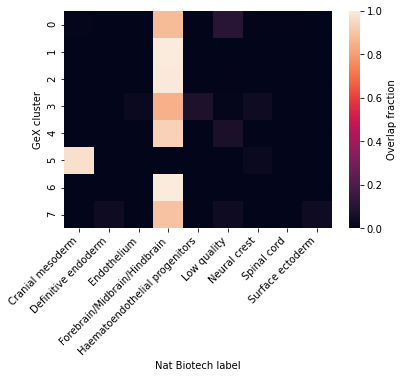

In [114]:
cm = pd.DataFrame(np.zeros((len(np.unique(combined_data['g_labels'])), len(np.unique(combined_data['celltype'].values)))))
cm.index = np.unique(combined_data['g_labels'])
cm.columns = np.unique(combined_data['celltype'].values)

for i in range(len(combined_data['g_labels'])):
    cm.loc[combined_data['g_labels'].values[i], combined_data['celltype'].values[i]] += 1

cm = cm.divide(cm.sum(axis=1), axis=0)
#cm = cm.reindex(index=[0,1,2,3,4,5,6,7],
#                columns=['Anterior somitic tissues','Cranial mesoderm','Forebrain/Midbrain/Hindbrain','Spinal cord','Endothelium','Low quality','Dermomyotome','Neural crest','Erythroid','Gut tube','Haematoendothelial progenitors','Intermediate mesoderm','NMP','Sclerotome','Splanchnic mesoderm','Surface ectoderm'])
g = sns.heatmap(cm, cbar_kws={'label': 'Overlap fraction'})
g.set(xlabel='Nat Biotech label', ylabel='GeX cluster')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/celltypes_heatmap.pdf', bbox_inches='tight')
plt.show()

### Biophysical and boundary analysis
Find boundaries between cell type compartments

In [101]:
# Define which boundary we're investigating by which celltypes are present

boundary_celltypes = ['Forebrain/Midbrain/Hindbrain', 'Cranial mesoderm']

In [104]:
# Find metric to highlight boundary between two celltypes or clusters
# Use frac(homotypic) * frac(heterotypic)
# value is high when cell has 1/2 neighbours of its own type and 1/2 neighbours of other cell type

boundary_likelihood = np.zeros(combined_data.shape[0])

for i, cell in enumerate(combined_data.index.values):
    n = np.where(adj_mat.loc[cell,:] != 0)[0]
    neigh_celltypes = combined_data.iloc[n, 18].values
    if len(neigh_celltypes) == 0:
        continue
    frac_1 = np.divide(np.sum(np.isin(neigh_celltypes,boundary_celltypes[0])), len(neigh_celltypes))
    frac_2 = np.divide(np.sum(np.isin(neigh_celltypes,boundary_celltypes[1])), len(neigh_celltypes))
    boundary_likelihood[i] = frac_1*frac_2
    boundary_likelihood[boundary_likelihood < 0.15] = 0

In [72]:
spatialplot(boundary_likelihood, 'continuous', cell_positions, img_path, legend='Boundary Likelihood', size=80, file='/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/boundary_likelihood_spatialplot_0_1.pdf')

Compute distance to boundary for all cells

In [105]:
# Compute distance from boundary
# Use # of neighbours instead of pixel distance to allow for binning

distance_to_boundary = -1 * np.ones(adj_mat.shape[0])

distance_to_boundary[boundary_likelihood > 0] = 0

n_neighbours = 1
while any(distance_to_boundary == -1) and n_neighbours > 0:
    curr_cells = np.where(distance_to_boundary != -1)[0]
    neighbours = np.where(np.sum(adj_mat.iloc[curr_cells,:].values, axis=0) != 0)[0]
    neighbours = neighbours[np.isin(neighbours, curr_cells, invert=True)]

    n_neighbours = len(neighbours)
    distance_to_boundary[neighbours] = np.max(distance_to_boundary) + 1

distance_to_boundary = pd.DataFrame(data=distance_to_boundary, columns=['distance'])
distance_to_boundary.set_index(adj_mat.index, inplace=True)

In [90]:
# Plot to check

spatialplot(distance_to_boundary.values, 'continuous', cell_positions, img_path, legend='Distance', size=80,file='/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/distance_to_boundary_spatialplot_0_6_7.pdf')

Plot tension as a function of distance to boundary for both celltypes

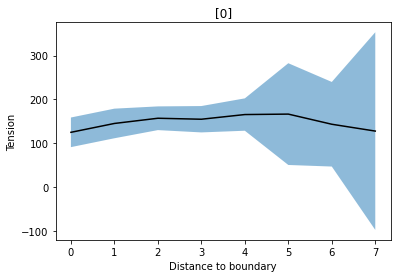

In [93]:
boundary_adj_mat = adj_mat.iloc[np.isin(combined_data['phenograph_clusters'], boundary_celltypes[0]),np.isin(combined_data['phenograph_clusters'], boundary_celltypes[0])]
boundary_likelihood_subset = boundary_likelihood[np.isin(combined_data['phenograph_clusters'], boundary_celltypes[0])]

edge_indices = np.nonzero(np.triu(boundary_adj_mat))

homotypic_junctions = pd.DataFrame(data=np.array([boundary_adj_mat.columns.values[edge_indices[0]], boundary_adj_mat.columns.values[edge_indices[1]],
                                                  boundary_adj_mat.to_numpy()[edge_indices[0], edge_indices[1]]]).T,
                                   columns=['cell_1', 'cell_2', 'tension'])
homotypic_junctions.insert(homotypic_junctions.shape[1], 'distance_to_boundary', np.zeros(homotypic_junctions.shape[0]))

for i in homotypic_junctions.index:
    cell_1_dist = distance_to_boundary.loc[homotypic_junctions.loc[i, 'cell_1'], 'distance']
    cell_2_dist = distance_to_boundary.loc[homotypic_junctions.loc[i, 'cell_2'], 'distance']

    if cell_1_dist > -1 and cell_2_dist > -1:
        homotypic_junctions.loc[i, 'distance_to_boundary'] = np.minimum(cell_1_dist, cell_2_dist)
    else:
        homotypic_junctions.loc[i, 'distance_to_boundary'] = -1

homotypic_junctions = homotypic_junctions.iloc[homotypic_junctions['distance_to_boundary'].values != -1,]


junctions_summary = homotypic_junctions.groupby('distance_to_boundary')['tension'].agg(['median','sem'])
junctions_summary['ci95_hi'] = junctions_summary['median'] + 1.96*junctions_summary['sem']
junctions_summary['ci95_lo'] = junctions_summary['median'] - 1.96*junctions_summary['sem']

plt.plot(junctions_summary.index.values, junctions_summary['median'], 'k-')
plt.fill_between(junctions_summary.index.values, junctions_summary['ci95_lo'], junctions_summary['ci95_hi'], alpha=0.5)
plt.xlabel('Distance to boundary')
plt.ylabel('Tension')
plt.title(boundary_celltypes[0])
plt.savefig('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_dorsal/tension_boundary_plot_0_6_7_celltype0.pdf')
plt.show()

Plot gene expression as a function of distance to boundary

 27%|██▋       | 19/70 [00:06<00:14,  3.48it/s]/var/folders/9b/tk8dk8rd3wsgj6zg8jqypy3h0000gn/T/ipykernel_14822/3450526313.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Smad8 failed


 61%|██████▏   | 43/70 [00:14<00:08,  3.07it/s]

Zeb11 failed


100%|██████████| 70/70 [00:21<00:00,  3.20it/s]

['Actg1', 'Actg2', 'Actb', 'Vangl1', 'Vangl2', 'Myh1', 'Myh2', 'Myh3', 'Myh4', 'Myh5', 'Myh6', 'Myh7', 'Myh8', 'Myh9', 'Myh10', 'Myh11', 'Myh12', 'Myh13', 'Myh14', 'Myh15', 'Myh16', 'Myh17', 'Myh18', 'Myh19', 'Myh20', 'Cdh1', 'Cdh2', 'Cdh3', 'Cdh4', 'Cdh5', 'Cdh6', 'Cdh7', 'Cdh8', 'Cdh9', 'Cdh10', 'Cdh11', 'Cdh12', 'Cdh13', 'Cdh14', 'Cdh15', 'Cdh16', 'Cdh17', 'Cdh18', 'Cdh19', 'Cdh20'] failed


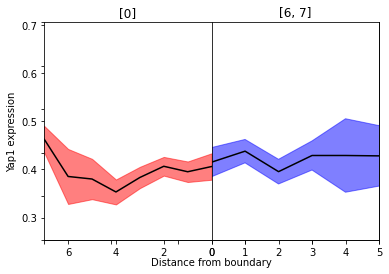

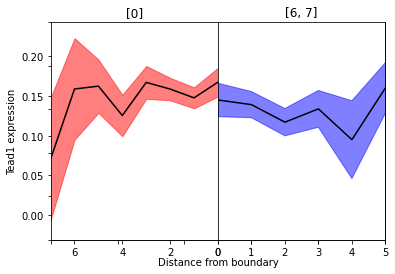

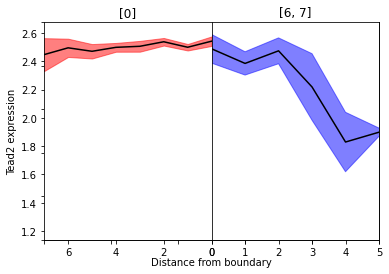

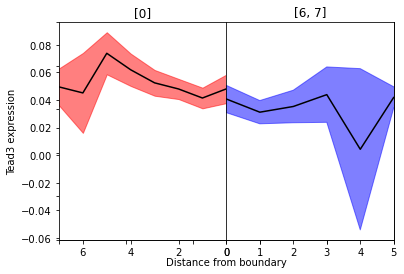

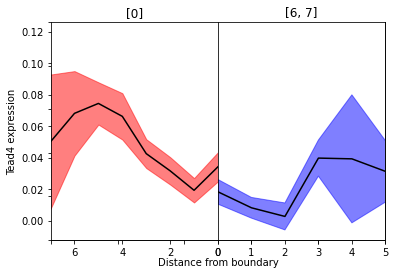

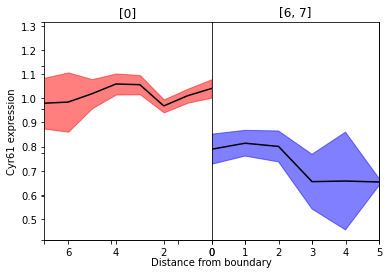

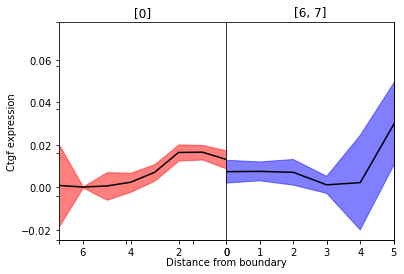

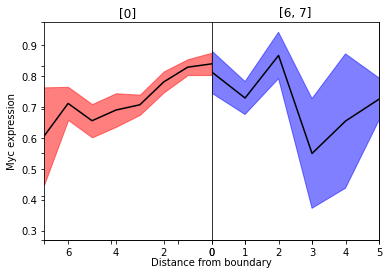

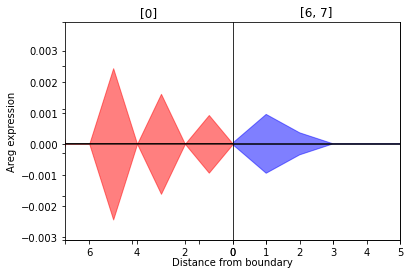

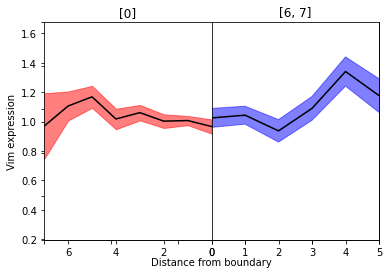

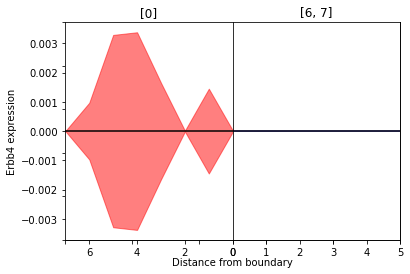

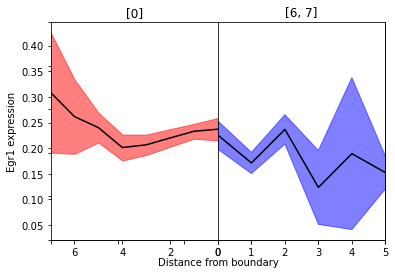

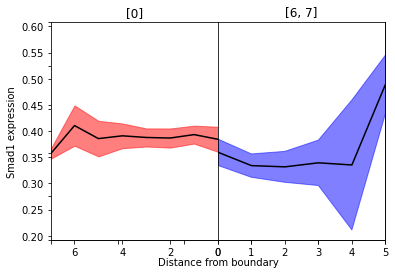

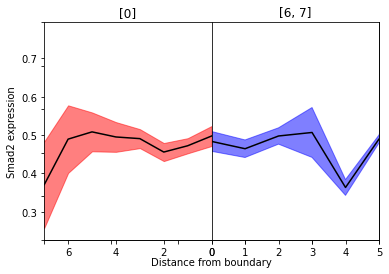

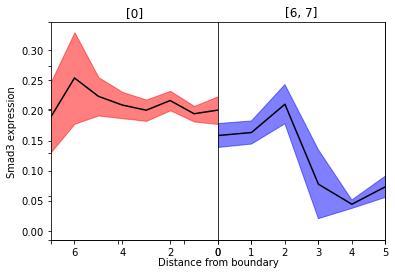

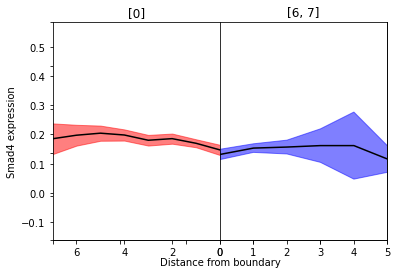

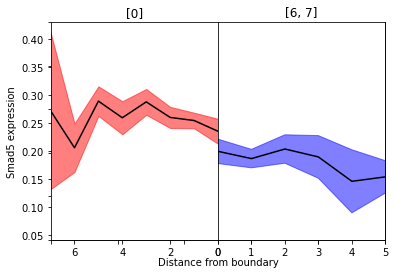

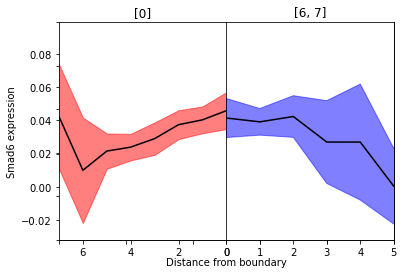

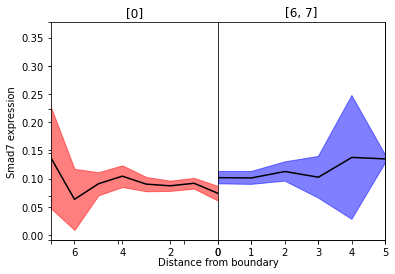

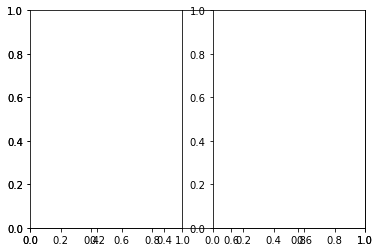

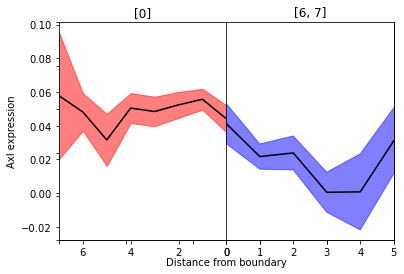

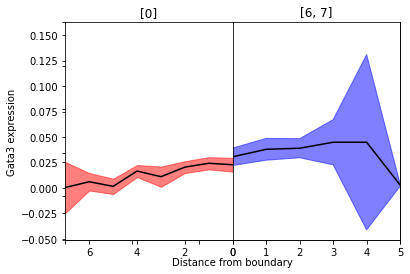

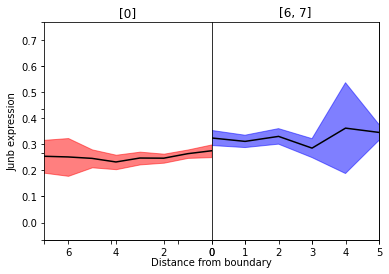

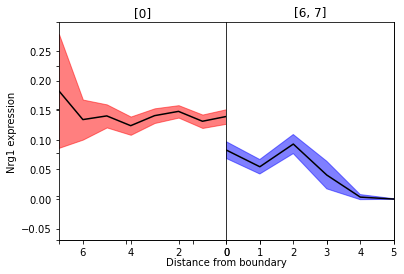

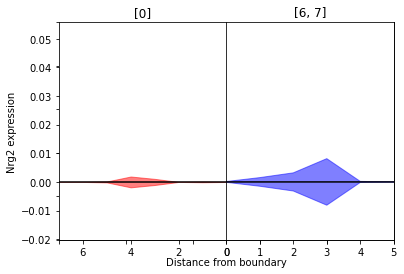

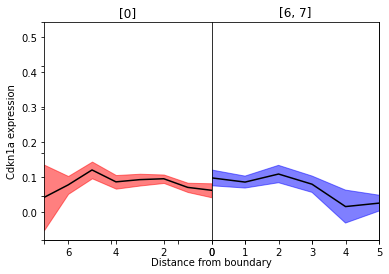

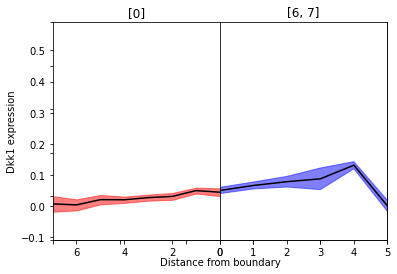

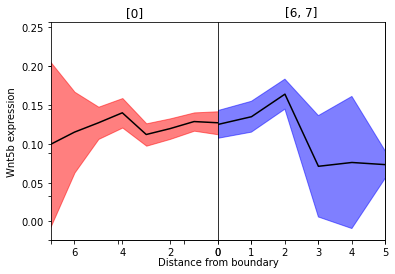

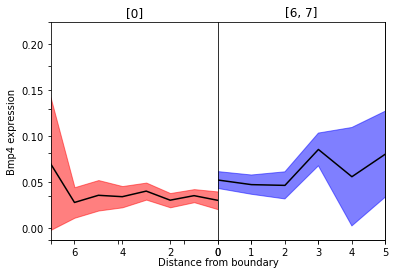

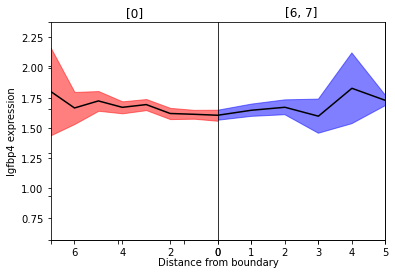

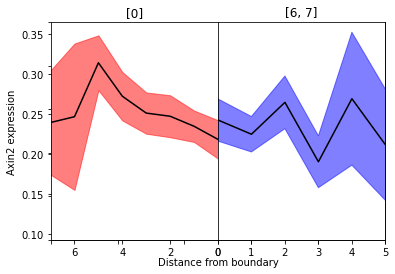

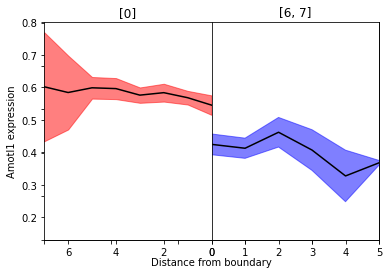

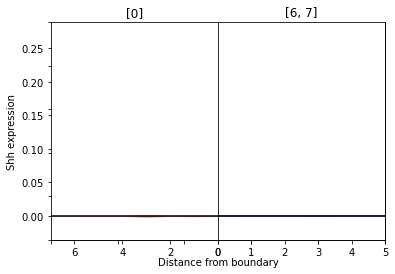

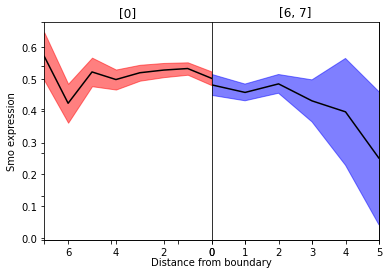

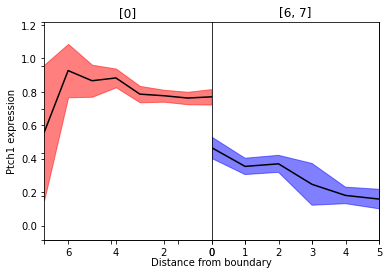

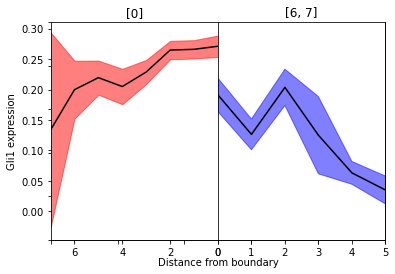

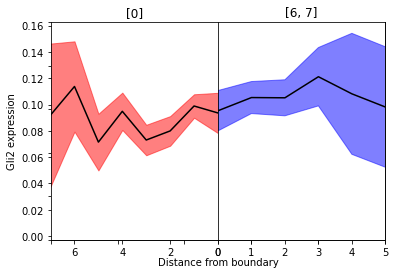

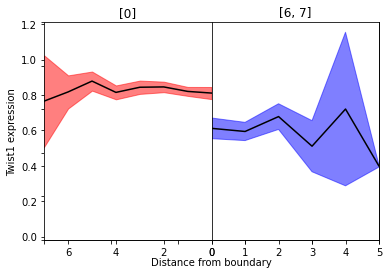

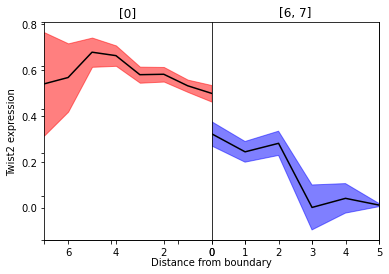

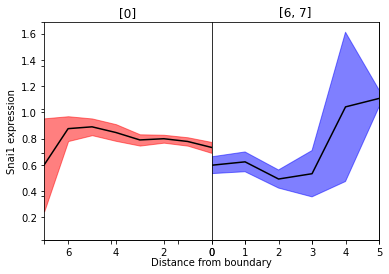

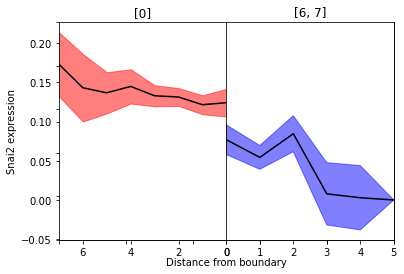

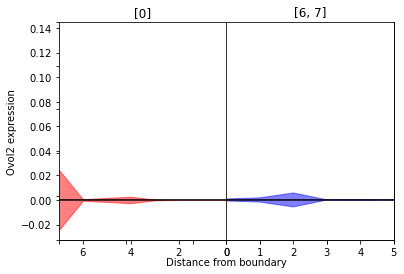

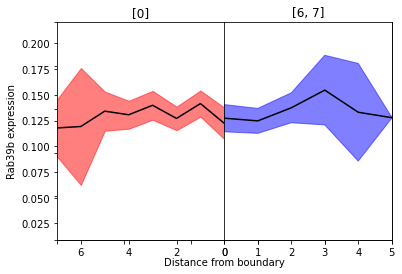

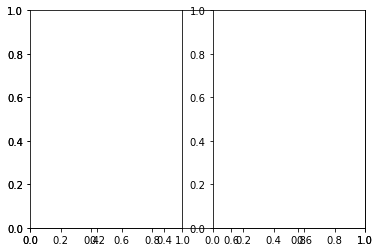

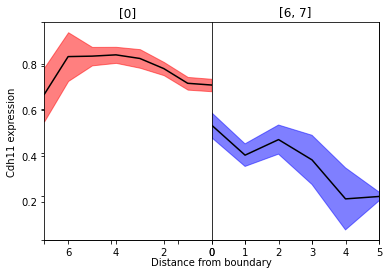

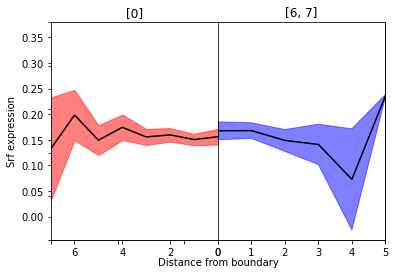

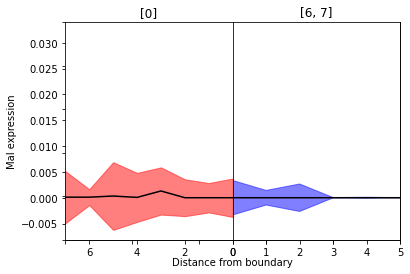

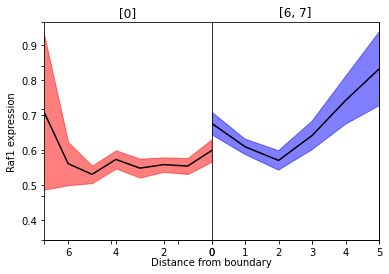

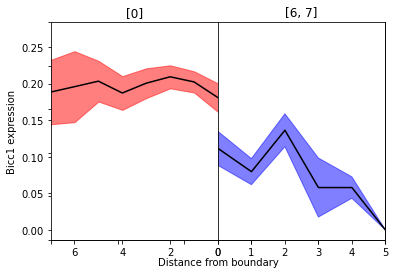

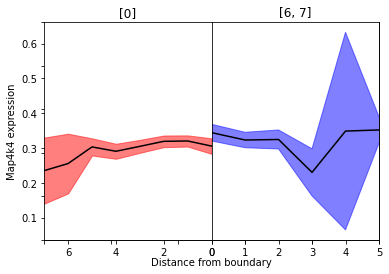

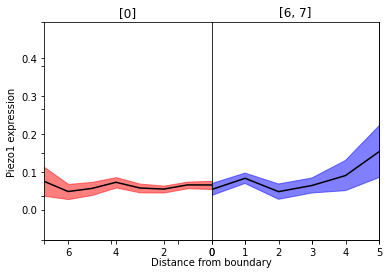

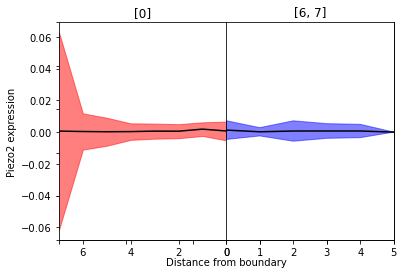

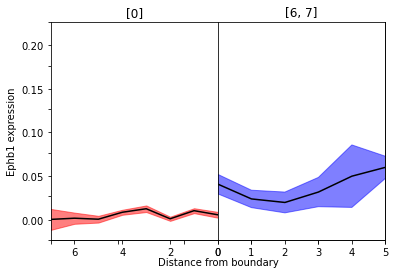

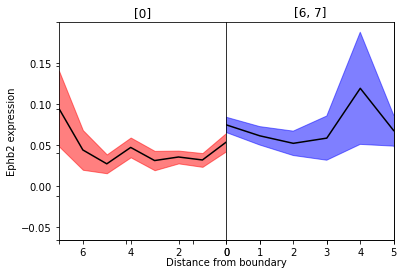

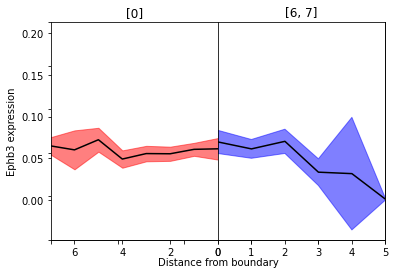

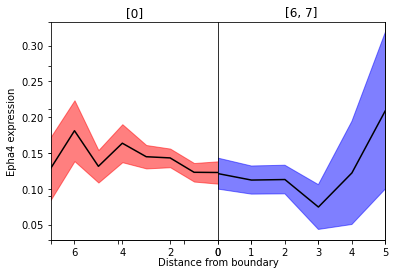

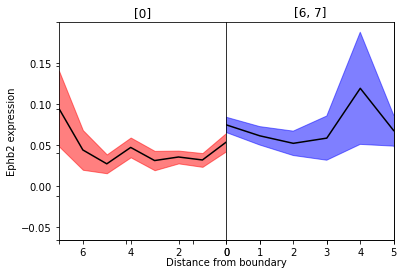

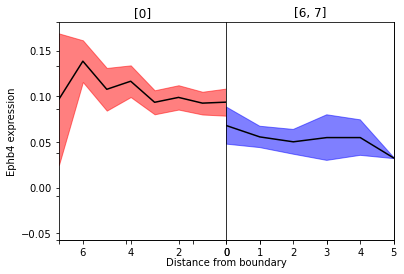

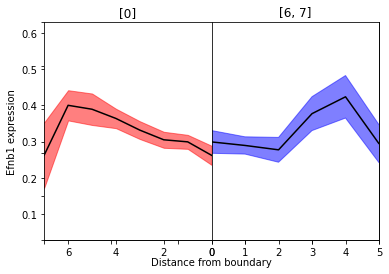

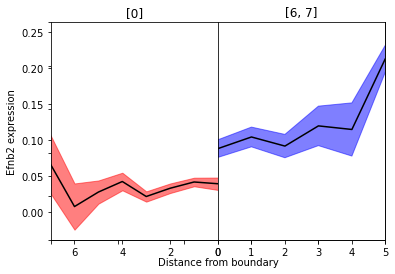

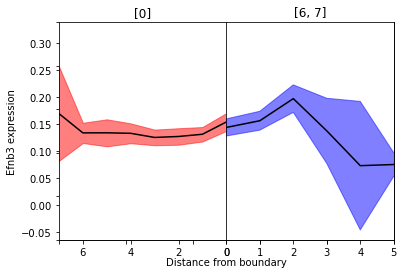

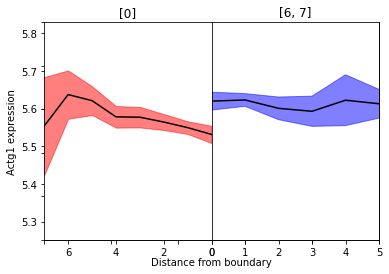

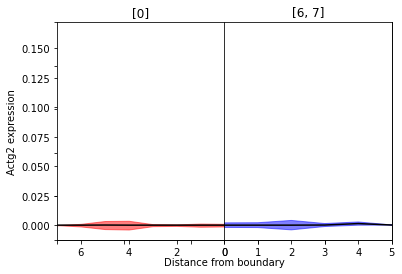

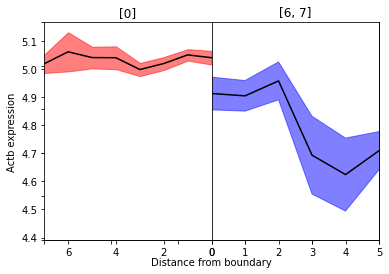

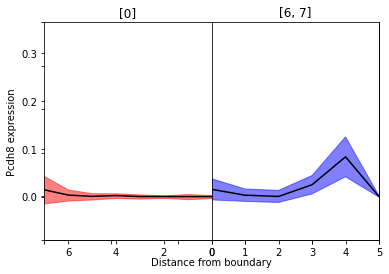

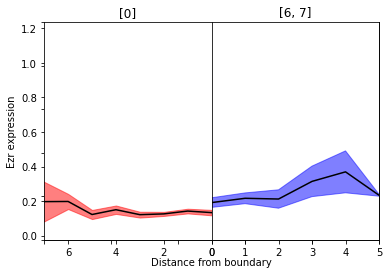

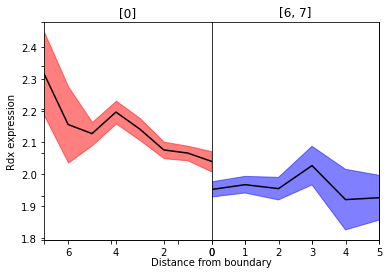

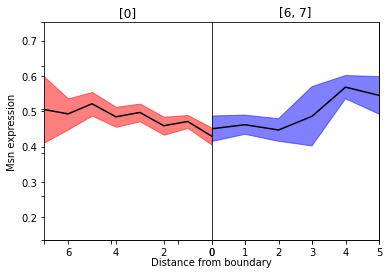

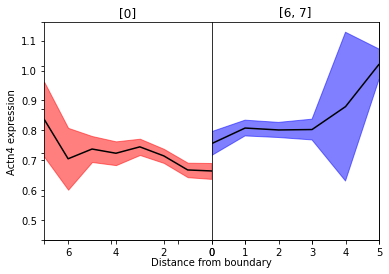

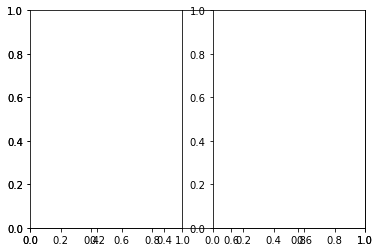

In [49]:
for gene in tqdm(genes):
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122, sharey = ax1)

        # For one side of the boundary
        cells = combined_data.index.values[np.isin(combined_data['phenograph_clusters'], boundary_celltypes[0])]
        boundary_distance_subset = distance_to_boundary.loc[cells]
        gene_expression_subset = pd.DataFrame(data=np.vstack([gex_res.loc[gene, cells].values, boundary_distance_subset['distance'].values]).T,
                                            columns=['expression','distance_to_boundary'], index=cells)
        junctions_summary = gene_expression_subset.groupby('distance_to_boundary')['expression'].agg(['median','sem'])
        junctions_summary['ci95_hi'] = junctions_summary['median'] + 1.96*junctions_summary['sem']
        junctions_summary['ci95_lo'] = junctions_summary['median'] - 1.96*junctions_summary['sem']

        ax1.plot(junctions_summary.index.values, junctions_summary['median'], 'k-')
        ax1.fill_between(junctions_summary.index.values, junctions_summary['ci95_lo'], junctions_summary['ci95_hi'], alpha=0.5, color='r')
        ax1.set_title(boundary_celltypes[0])
 #       ax1.set_xlim([np.max(junctions_summary.index.values),np.min(junctions_summary.index.values)])
        ax1.set_xlim([7,0])
        ax1.set_ylabel(f'{gene} expression')

        # For the other side of the boundary
        cells = combined_data.index.values[np.isin(combined_data['phenograph_clusters'], boundary_celltypes[1])]
        boundary_distance_subset = distance_to_boundary.loc[cells]
        gene_expression_subset = pd.DataFrame(data=np.vstack([gex_res.loc[gene, cells].values, boundary_distance_subset['distance'].values]).T,
                                              columns=['expression','distance_to_boundary'], index=cells)
        junctions_summary = gene_expression_subset.groupby('distance_to_boundary')['expression'].agg(['median','sem'])
        junctions_summary['ci95_hi'] = junctions_summary['median'] + 1.96*junctions_summary['sem']
        junctions_summary['ci95_lo'] = junctions_summary['median'] - 1.96*junctions_summary['sem']

        ax2.plot(junctions_summary.index.values, junctions_summary['median'], 'k-')
        ax2.fill_between(junctions_summary.index.values, junctions_summary['ci95_lo'], junctions_summary['ci95_hi'], alpha=0.5, color='b')
        ax2.set_title(boundary_celltypes[1])
        ax2.get_yaxis().set_visible(False)
#        ax2.set_xlim([np.min(junctions_summary.index.values),np.max(junctions_summary.index.values)])
        ax2.set_xlim([0,5])

        # Set overall axis labels and formatting
        ax.set_xlabel('Distance from boundary',labelpad=10)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.savefig(f'/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Nat_Biotech_Analysis/embryo2_dorsal/plots/gene_boundary_plots/{gene}.pdf')
#        plt.show()
    except:
        print(f'{gene} failed')

Compute heterotypic and homotypic junction tensions
- heterotypic at boundary
- homotypic at boundary
- homotypic away from boundary

In [106]:
boundary_adj_mat = adj_mat.iloc[np.isin(combined_data['celltype'], boundary_celltypes),np.isin(combined_data['celltype'], boundary_celltypes)]
edge_indices = np.nonzero(np.triu(boundary_adj_mat))
boundary_tensions = pd.DataFrame(data=np.array([boundary_adj_mat.columns.values[edge_indices[0]], boundary_adj_mat.columns.values[edge_indices[1]],
                                                boundary_adj_mat.to_numpy()[edge_indices[0], edge_indices[1]]]).T,
                                   columns=['cell_1', 'cell_2', 'tension'])

boundary_tensions['type'] = ''
boundary_tensions['distance_to_boundary'] = 0

for boundary in boundary_tensions.index:
    celltype_1 = combined_data.loc[boundary_tensions.loc[boundary, 'cell_1'], 'celltype']
    celltype_2 = combined_data.loc[boundary_tensions.loc[boundary, 'cell_2'], 'celltype']

    dist_1 = distance_to_boundary.loc[boundary_tensions.loc[boundary, 'cell_1']].values
    dist_2 = distance_to_boundary.loc[boundary_tensions.loc[boundary, 'cell_2']].values
    distance = np.min([dist_1, dist_2])
    boundary_tensions.loc[boundary, 'distance_to_boundary'] = distance

    if np.isin(celltype_1,boundary_celltypes[0]) and np.isin(celltype_2,boundary_celltypes[1]) and distance == 0:
        boundary_tensions.loc[boundary, 'type'] = 'heterotypic'
    elif np.isin(celltype_2,boundary_celltypes[0]) and np.isin(celltype_1,boundary_celltypes[1]) and distance == 0:
        boundary_tensions.loc[boundary, 'type'] = 'heterotypic'
    elif np.isin(celltype_1,boundary_celltypes[0]) and np.isin(celltype_2,boundary_celltypes[0]) and distance == 0:
        boundary_tensions.loc[boundary, 'type'] = f'{boundary_celltypes[0]}_at_boundary'
    elif np.isin(celltype_1,boundary_celltypes[0]) and np.isin(celltype_2,boundary_celltypes[0]) and 1 <= distance <= 5:
        boundary_tensions.loc[boundary, 'type'] = f'{boundary_celltypes[0]}_awayfrom_boundary'
    elif np.isin(celltype_1,boundary_celltypes[1]) and np.isin(celltype_2,boundary_celltypes[1]) and distance == 0:
        boundary_tensions.loc[boundary, 'type'] =  f'{boundary_celltypes[1]}_at_boundary'
    elif np.isin(celltype_1,boundary_celltypes[1]) and np.isin(celltype_2,boundary_celltypes[1]) and 1 <= distance <= 5:
        boundary_tensions.loc[boundary, 'type'] =  f'{boundary_celltypes[1]}_awayfrom_boundary'
    else:
        boundary_tensions.loc[boundary, 'type'] = 'other'

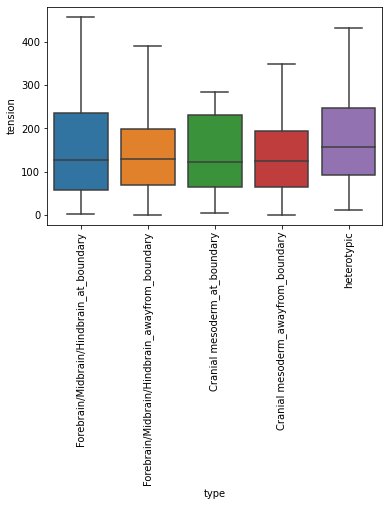

In [107]:
boundary_tensions['tension'] = boundary_tensions['tension'].values.astype(float)

sns.boxplot(x="type", y="tension", data=boundary_tensions[boundary_tensions['type']!='other'], showfliers=False,
            order=[f'{boundary_celltypes[0]}_at_boundary',f'{boundary_celltypes[0]}_awayfrom_boundary',f'{boundary_celltypes[1]}_at_boundary',f'{boundary_celltypes[1]}_awayfrom_boundary','heterotypic'])
plt.xticks(rotation=90)
plt.savefig('/Users/ruiyanghe/Desktop/Uni/PartIII/Project/Figures/embryo2_brain/boundary_tension_boxplot.pdf', bbox_inches='tight')
plt.show()

In [52]:
boundary_stats = pd.DataFrame(np.zeros([len(np.unique(boundary_tensions['type'].values)), 4]), columns=['mean','median','std','n_obs'], index=np.unique(boundary_tensions['type'].values))

for boundary_type in boundary_stats.index:
    boundary_stats.loc[boundary_type, 'median'] = np.median(boundary_tensions.iloc[boundary_tensions['type'].values == boundary_type,]['tension'].values)
    boundary_stats.loc[boundary_type, 'mean'] = np.mean(boundary_tensions.iloc[boundary_tensions['type'].values == boundary_type,]['tension'].values)
    boundary_stats.loc[boundary_type, 'std'] = np.std(boundary_tensions.iloc[boundary_tensions['type'].values == boundary_type,]['tension'].values)
    boundary_stats.loc[boundary_type, 'n_obs'] = boundary_tensions.iloc[boundary_tensions['type'].values == boundary_type,]['tension'].values.shape[0]

boundary_stats = boundary_stats.loc[boundary_stats.index.values != 'other',:]

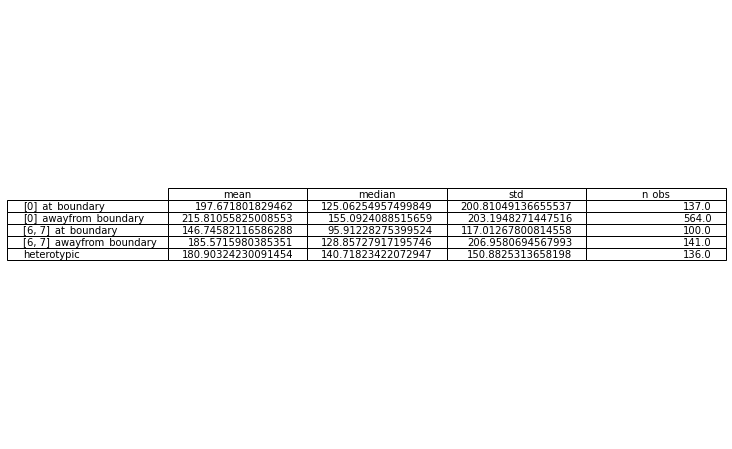

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.table(cellText=boundary_stats.values, colLabels=boundary_stats.keys(), rowLabels=boundary_stats.index.values,
         loc='center', fontsize=100)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')
plt.show()

Define 'adhesion potential' for each cell based on receptor-ligand pair of itself and neighbours

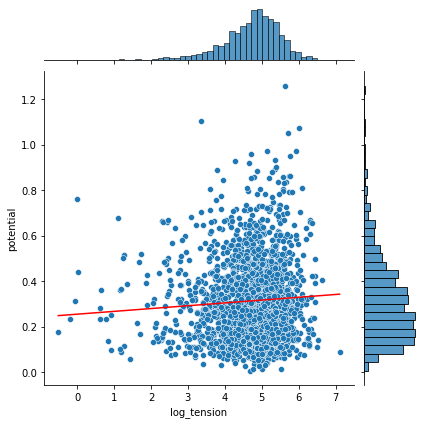

0.003665360547152481
0.012392300741745917


In [59]:
import statsmodels.api as sm

#gene_pairs = [['Efnb1', 'Ephb2'],['Efnb2','Ephb2'],['Efnb2','Ephb4'],['Efnb3','Epha4']]
gene_pairs = [['Efnb1', 'Ephb2']]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

for gene_pair in gene_pairs:
    gene1 = pd.DataFrame(data=np.expand_dims(NormalizeData(gex_res.loc[gene_pair[0],:]),1), columns=['normalised'], index=gex_res.columns)
    gene2 = pd.DataFrame(data=np.expand_dims(NormalizeData(gex_res.loc[gene_pair[1],:]),1), columns=['normalised'], index=gex_res.columns)


    junction_adhesion = boundary_tensions[['cell_1','cell_2','type','distance_to_boundary','tension']]
    junction_adhesion['cell_1'] = junction_adhesion['cell_1']
    junction_adhesion['cell_2'] = junction_adhesion['cell_2']

    junction_adhesion['potential'] = gene1.loc[junction_adhesion['cell_1'].values].values * gene2.loc[junction_adhesion['cell_2'].values].values + \
                                     gene2.loc[junction_adhesion['cell_1'].values].values * gene1.loc[junction_adhesion['cell_2'].values].values
    junction_adhesion['log_tension'] = np.log(junction_adhesion['tension'].values)

    model = sm.OLS(junction_adhesion['potential'].values, sm.add_constant(junction_adhesion['log_tension'].values)).fit()
    x = np.linspace(np.min(sm.add_constant(junction_adhesion['log_tension'].values)), np.max(sm.add_constant(junction_adhesion['log_tension'].values)), 100)
    y = model.params[0] + model.params[1]*x
    p = sns.jointplot(x=junction_adhesion['log_tension'], y=junction_adhesion['potential'])
    p.ax_joint.plot(x, y, 'r-')
    plt.show()

    print(model.pvalues[1])
    print(model.params[1])

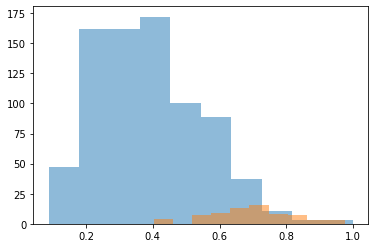

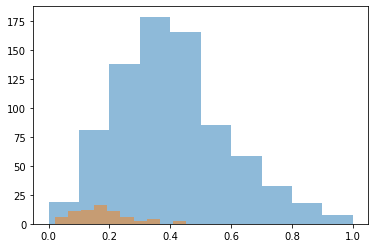

In [56]:
plt.hist(gene1.loc[combined_data.index.values[combined_data['celltype']=='Forebrain/Midbrain/Hindbrain']], alpha=0.5)
plt.hist(gene1.loc[combined_data.index.values[combined_data['celltype']=='Cranial mesoderm']], alpha=0.5)

plt.show()

plt.hist(gene2.loc[combined_data.index.values[combined_data['celltype']=='Forebrain/Midbrain/Hindbrain']], alpha=0.5)
plt.hist(gene2.loc[combined_data.index.values[combined_data['celltype']=='Cranial mesoderm']], alpha=0.5)

plt.show()

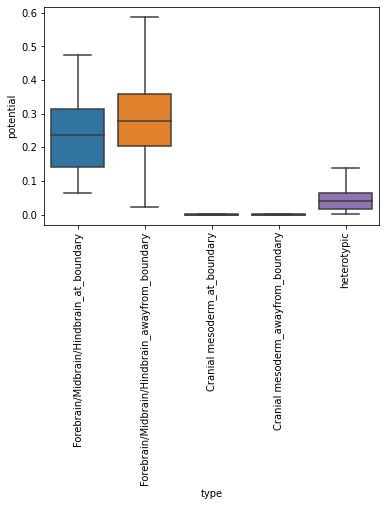

In [38]:
sns.boxplot(x="type", y="potential", data=junction_adhesion[junction_adhesion['type']!='other'], showfliers=False,
            order=[f'{boundary_celltypes[0]}_at_boundary',f'{boundary_celltypes[0]}_awayfrom_boundary',f'{boundary_celltypes[1]}_at_boundary',f'{boundary_celltypes[1]}_awayfrom_boundary','heterotypic'])
plt.xticks(rotation=90)
plt.show()

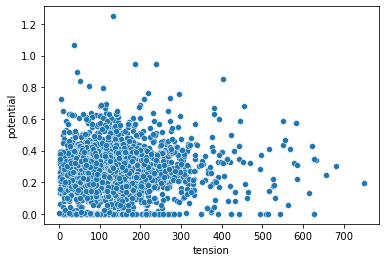

In [39]:
sns.scatterplot(x='tension',y='potential',data=junction_adhesion[junction_adhesion['tension']<1000])
plt.show()